## Try to understand bathymetry grid cells of Fraser River inside NEMO

In [1]:
from salishsea_tools import (bathy_tools, nc_tools,viz_tools,tidetools)
from numpy import loadtxt
from __future__ import division, print_function
from salishsea_tools.nowcast import figures
import scipy.io as sio
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

In [2]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/\
/nemo-forcing/grid/bathy_meter_SalishSea.nc', 'r')
bathyy = bathy.variables['Bathymetry'][:]

In [3]:
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '13'}

   # Create bathy_meter_SalishSea3.nc as fixed and extended file

In [4]:
!cp /ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea.nc \
bathy_meter_SalishSea3.nc
bathy_3 = nc.Dataset('bathy_meter_SalishSea3.nc','r+' )
bathyy_3 = bathy_3.variables['Bathymetry']
lon_3 = bathy_3.variables['nav_lon']
lat_3 = bathy_3.variables['nav_lat']

# Load river-bathymetry.txt file and assign value to bathyy_3

In [5]:
lines = loadtxt("river-bathymetry.txt", comments="#", delimiter=",", unpack=False)

In [6]:
list_of_lists = []
with open('river-bathymetry.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        # in alternative, if you need to use the file content as numbers
        # inner_list = [int(elt.strip()) for elt in line.split(',')]
        list_of_lists.append(inner_list)

In [7]:
by_cols = zip(*list_of_lists)
col_names = ('latitude index', 'longitude index', 'bathymetry')
by_names = {}
for i, col_name in enumerate(col_names):
    by_names[col_name] = by_cols[i]

In [8]:
lat_index = np.asarray(by_names['latitude index'])
lon_index = np.asarray(by_names['longitude index'])
bathy_index = np.asarray(by_names['bathymetry'])
jj = lat_index.astype(np.integer)
ii = lon_index.astype(np.integer)
bathy_value  = bathy_index.astype(np.float)

In [9]:
for i in np.arange(len(jj)):
    bathyy_3[jj[i], ii[i]] = bathy_value[i] + 3.095 ## assign values added with 3.095 mean sea level

/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


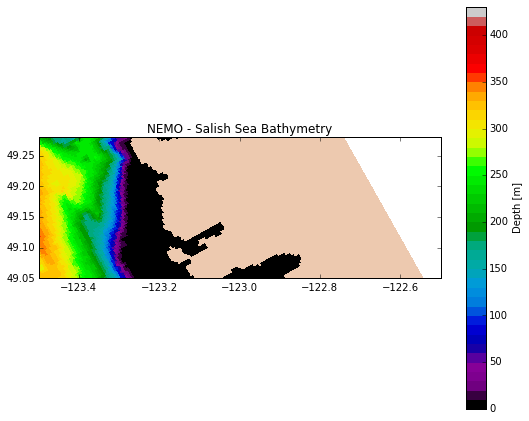

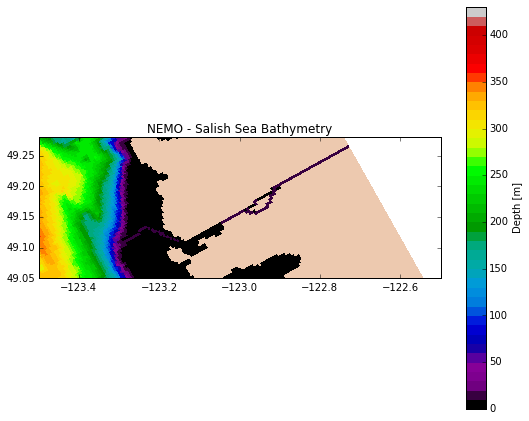

In [10]:
figg = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49.05, 49.28), 
colour_map='spectral', bins=50)

figg = bathy_tools.plot_colourmesh(
    bathy_3, 'NEMO - Salish Sea Bathymetry',
    axis_limits=(-123.5, -122.5, 49.05, 49.28), 
colour_map='spectral', bins=50)

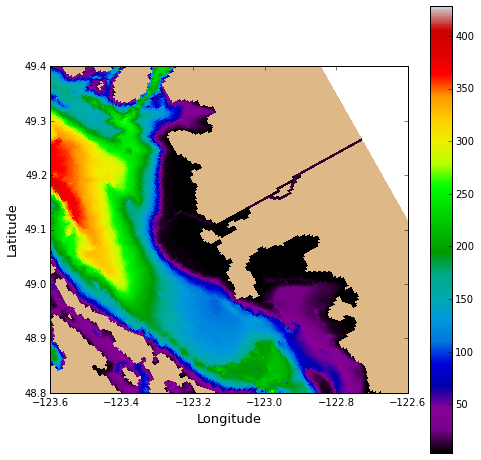

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.set_xlim(-123.6, -122.6)
axs.set_ylim(48.8, 49.4)
axs.set_xlabel('Longitude', **axis_font)
axs.set_ylabel('Latitude', **axis_font)
viz_tools.set_aspect(axs,coords='map',lats=lat_3)
cmap=plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh=axs.pcolormesh(lon_3[:],lat_3[:], bathyy_3[:],cmap=cmap)
cbar=fig.colorbar(mesh)

<matplotlib.colorbar.Colorbar instance at 0x7fbe74112290>

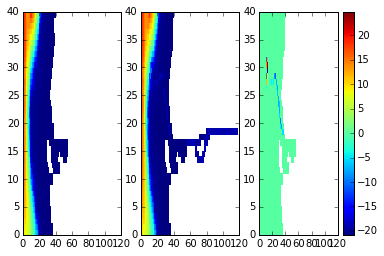

In [12]:
plt.subplot(1, 3, 1)
plt.pcolormesh(bathyy[400:440, 280:398])
plt.subplot(1, 3, 2)
plt.pcolormesh(bathyy_3[400:440, 280:398])
plt.subplot(1, 3, 3)
plt.pcolormesh(bathyy[400:440, 280:398] - bathyy_3[400:440, 280:398], 
               cmap=plt.cm.jet)
plt.colorbar()

In [13]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')

In [14]:
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]
lon = bathy.variables['nav_lon']
lat = bathy.variables['nav_lat']

## Show center grid and corner grid

-123.31577301
49.1077346802
-18.9463806152
6.46408081055
2.405


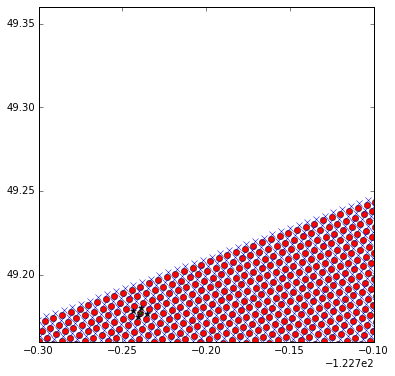

In [15]:
imin = 380; imax=420; jmin = 290; jmax = 398
plt.figure(figsize=(6,6))
plt.plot(lon[imin:imax,jmin:jmax], lat[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
plt.plot(lon_f[416,354], lat_f[416,354], '*k')
plt.plot(lon_f[416,355], lat_f[416,355], '*k')
plt.plot(lon_f[415,354], lat_f[415,354], '*k')
plt.plot(lon_f[415,355], lat_f[415,355], '*k')
plt.plot(lon[416,355], lat[416,355], '*g')
plt.xlim((-123., -122.8))
plt.ylim(( 49.16, 49.36))
print (lon_3[429, 291])
print (lat_3[429, 291])
print ((lon_3[429, 291] + 123) * 60)
print ((lat_3[429, 291] -49) *60)
print ((10.26 - 10) *9.25)

In [16]:
bathy_3.close() ## end edition

# For bathymetry 5:

In [4]:
bathy_5 = nc.Dataset('bathy_meter_SalishSea5.nc','r' )
bathyy_5 = bathy_5.variables['Bathymetry']
lon_5 = bathy_5.variables['nav_lon']
lat_5 = bathy_5.variables['nav_lat']

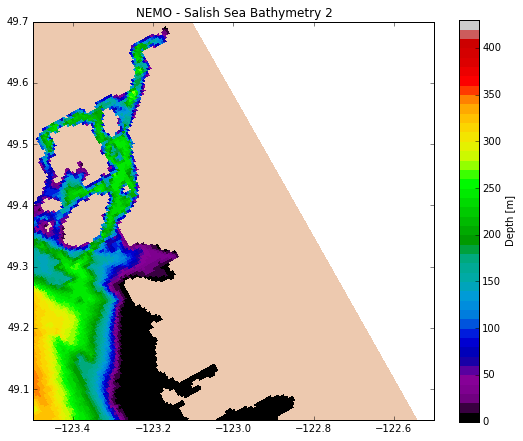

In [8]:
figg = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry 2',
    axis_limits=(-123.5, -122.5, 49.05, 49.7), 
colour_map='spectral', bins=50)

In [9]:
figg.savefig('bathymetry2.png')

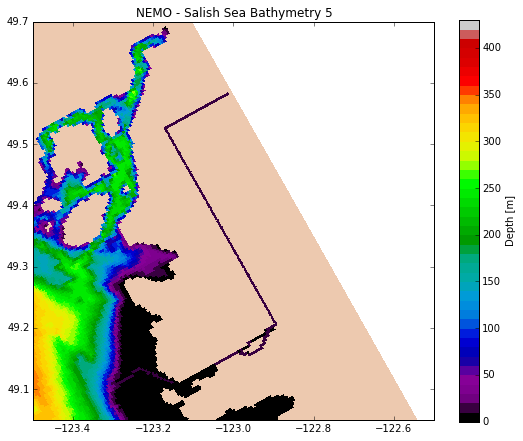

In [10]:
fig = bathy_tools.plot_colourmesh(
    bathy_5, 'NEMO - Salish Sea Bathymetry 5',
    axis_limits=(-123.5, -122.5, 49.05, 49.7), 
colour_map='spectral', bins=50)

In [11]:
fig.savefig('bathymetry5.png')

# For bathymetry6

In [12]:
bathy_6 = nc.Dataset('bathy_meter_SalishSea6.nc','r' )
bathyy_6 = bathy_6.variables['Bathymetry']
lon_6 = bathy_6.variables['nav_lon']
lat_6 = bathy_6.variables['nav_lat']

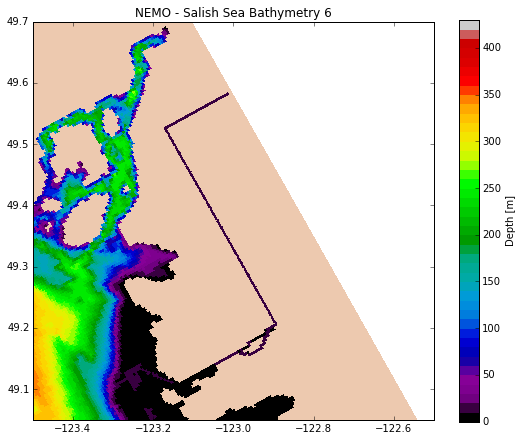

In [13]:
fig = bathy_tools.plot_colourmesh(
    bathy_6, 'NEMO - Salish Sea Bathymetry 6',
    axis_limits=(-123.5, -122.5, 49.05, 49.7), 
colour_map='spectral', bins=50)

In [14]:
fig.savefig('bathymetry6.png')